In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from functions import read_and_clean

In [8]:
# declare variables
cities = ['sydney', 'melbourne', 'brisbane']
years = ['2019', '2020', '2021', '2022']
columns_to_vis = ['WC', 'Analytic', 'cogproc', 'emo_pos', 'emo_anx', 'emo_anger', 'emo_sad', 'family', 'friend']

In [9]:
dataframes_to_vis = read_and_clean()

/Users/ivanosipchyk/dev/studies/reddits-visualization/src/visualization/functions.py:12: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path + city.capitalize() + '/' + city + '_' + year + '.csv')
/Users/ivanosipchyk/dev/studies/reddits-visualization/src/visualization/functions.py:12: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path + city.capitalize() + '/' + city + '_' + year + '.csv')
/Users/ivanosipchyk/dev/studies/reddits-visualization/src/visualization/functions.py:12: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path + city.capitalize() + '/' + city + '_' + year + '.csv')
/Users/ivanosipchyk/dev/studies/reddits-visualization/src/visualization/functions.py:12: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df

In [38]:
def visualize(dataframes_vis, agg_period):
    dataframes_dict_list = {}

    for city in cities:
        dataframes_list = []

        for key, value in dataframes_vis.items():
            if key[:-5] == city:
                dataframes_list.append(value)

        dataframes_dict_list[city] = dataframes_list

    for key, value in dataframes_dict_list.items():
        dataframes_grouped = [item.resample(agg_period).mean() for item in value]

        # print(len(dataframes_grouped))

        for item in dataframes_grouped:
            item['week_num'] = range(1, len(item)+1)

        # print(dataframes_grouped[0].head())
        for column in dataframes_grouped[0].columns:
            if column != 'week_num':
                # create a new figure and axis object for each plot
                fig, ax = plt.subplots()

                # plot the data on the current axis
                for df_grouped in dataframes_grouped:
                    ax.plot(df_grouped['week_num'], df_grouped[column], linestyle='solid')

                # set the title and axis labels
                ax.set_title(f'{column} in {key.capitalize()}')
                ax.set_xlabel('Week Number')
                ax.set_ylabel('Value')
                # create a legend for the graph
                ax.legend(['2019', '2020', '2021', '2022'])
                # display the plot
                plt.show()

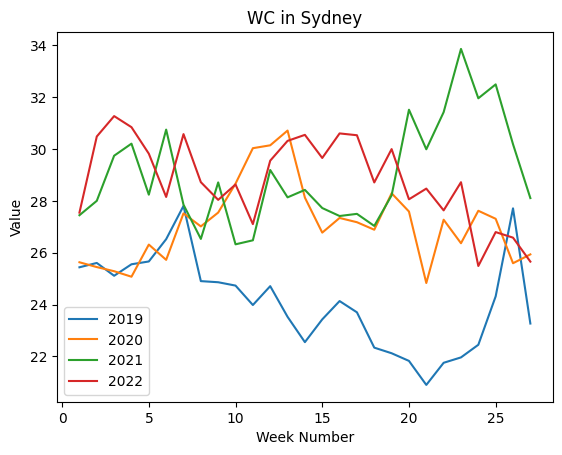

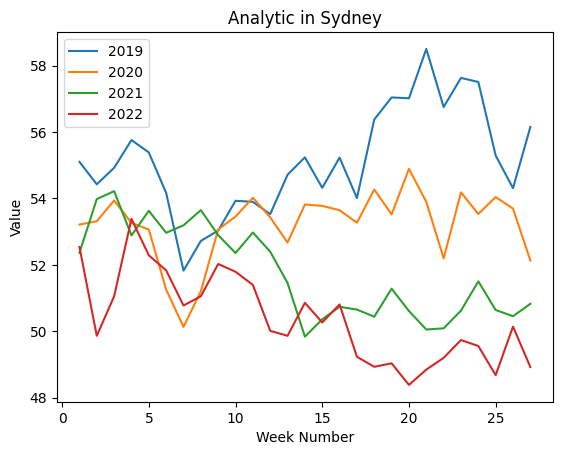

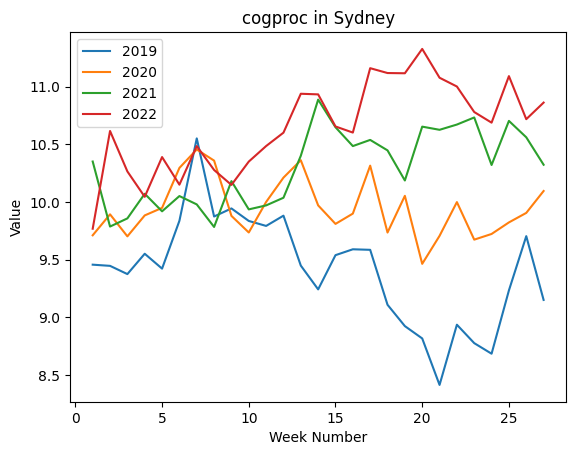

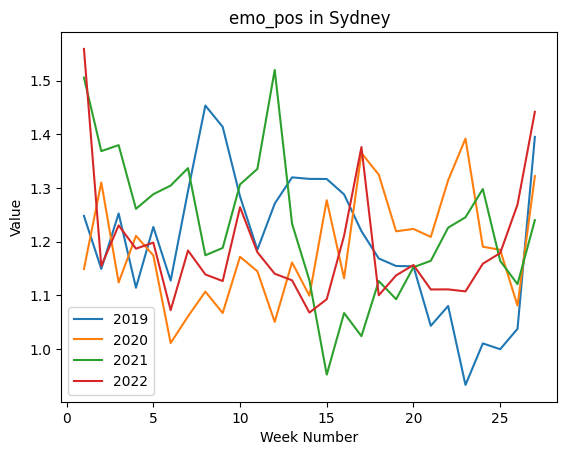

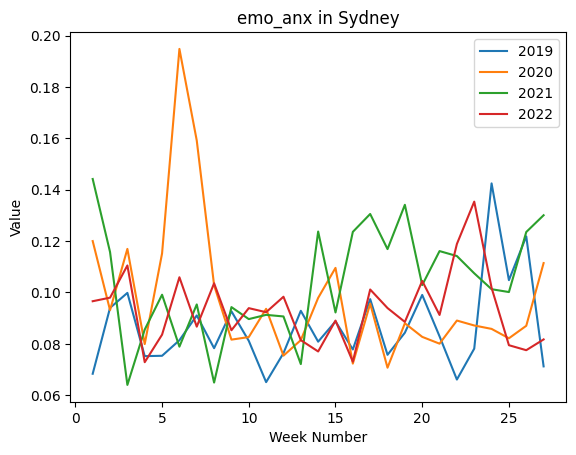

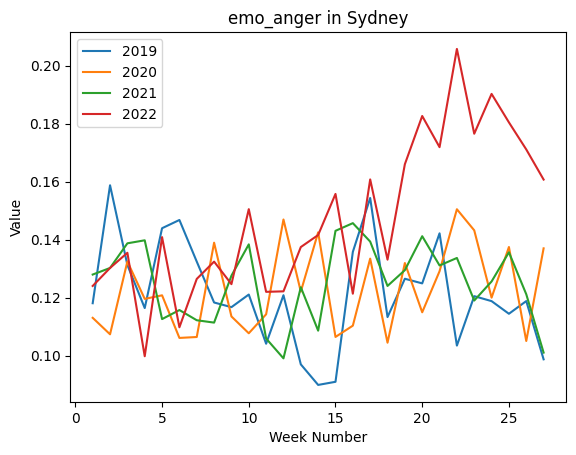

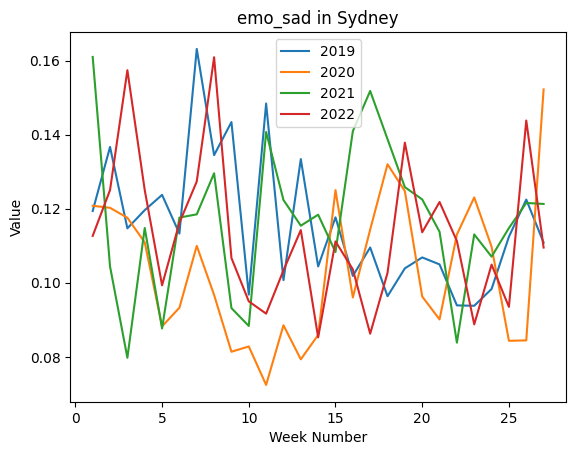

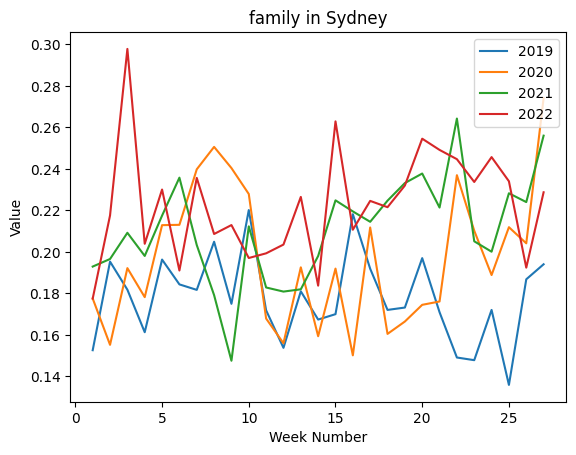

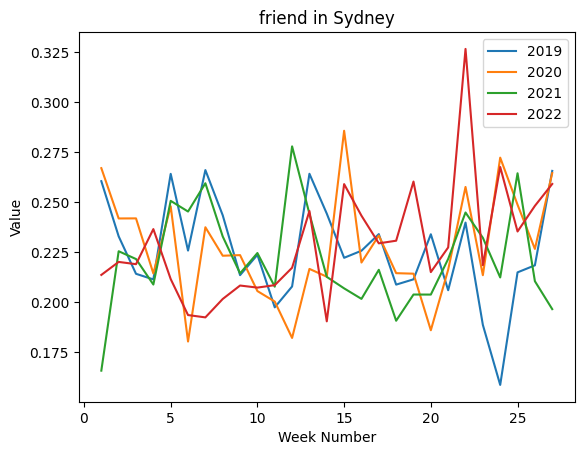

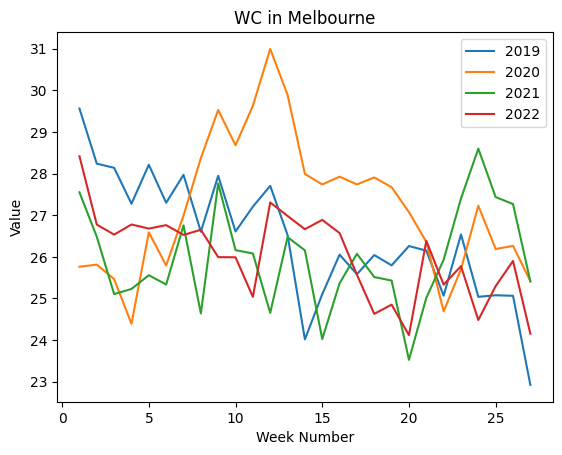

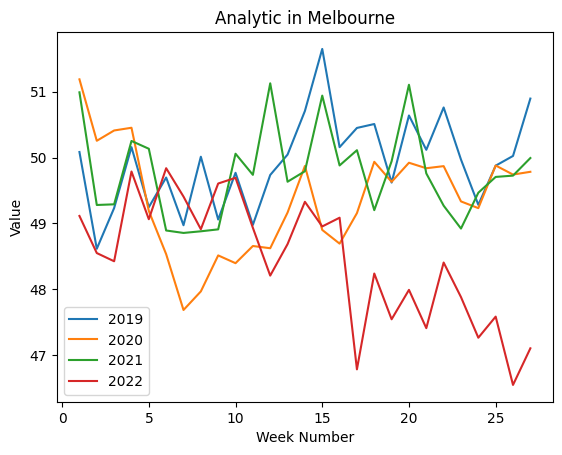

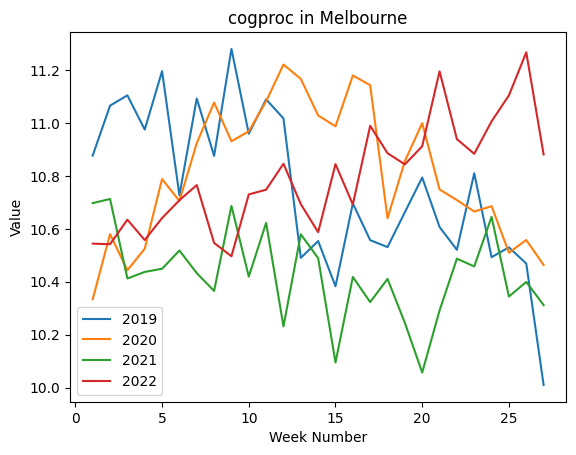

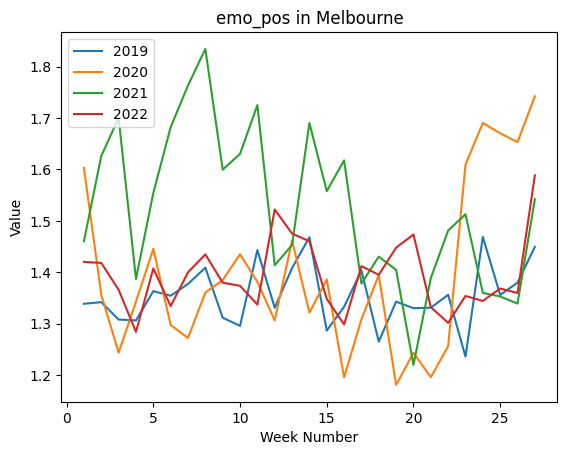

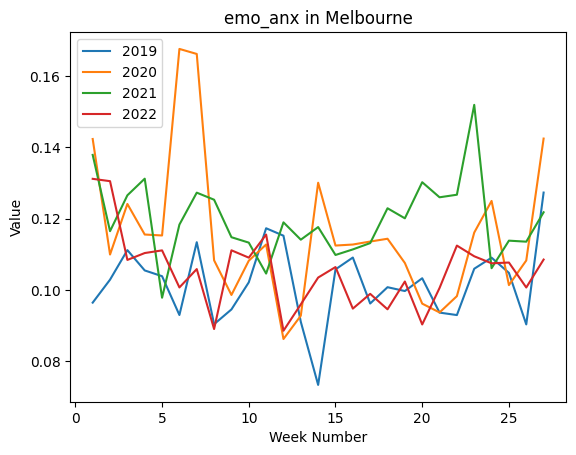

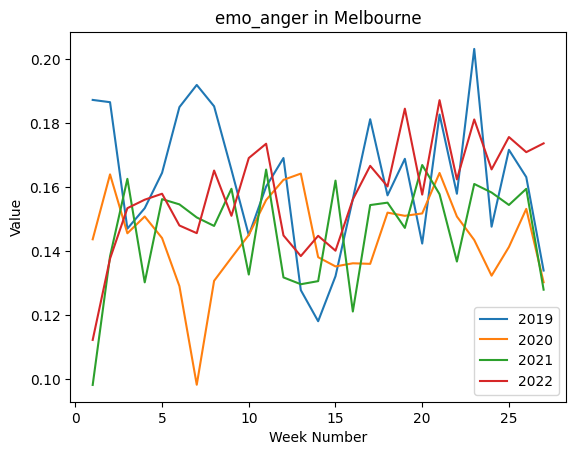

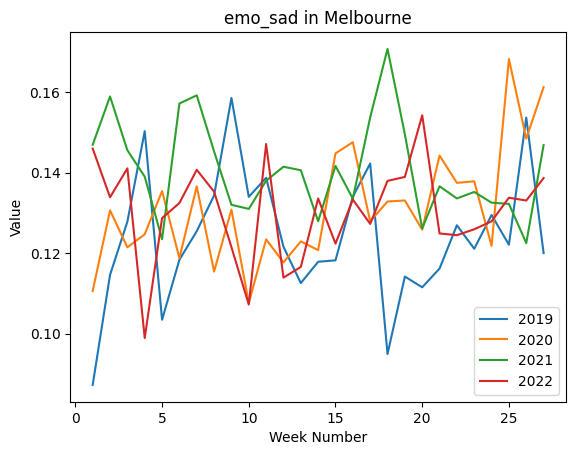

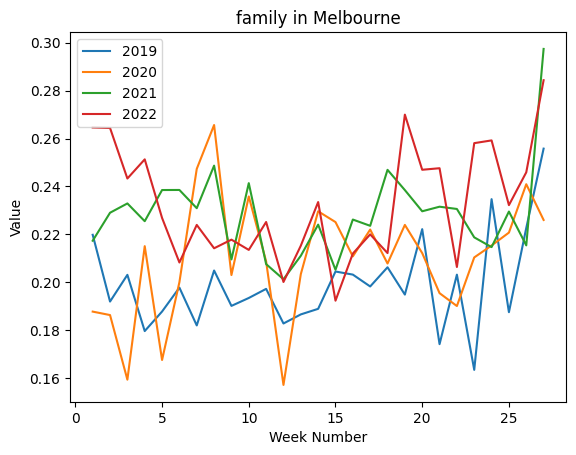

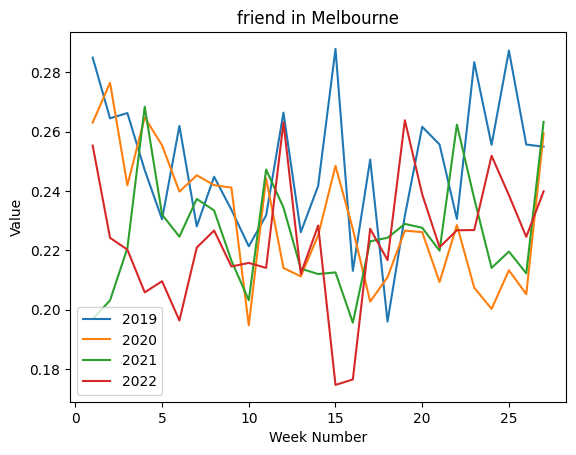

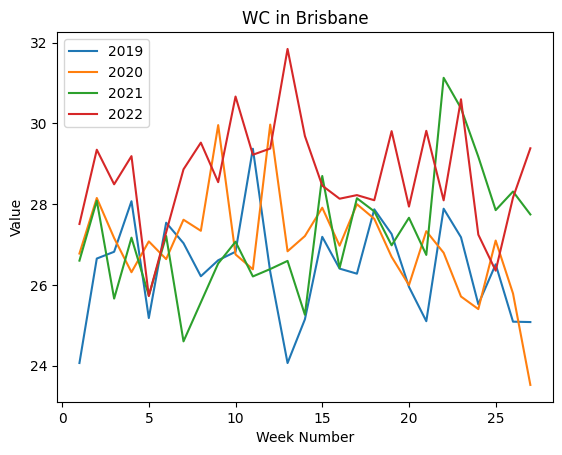

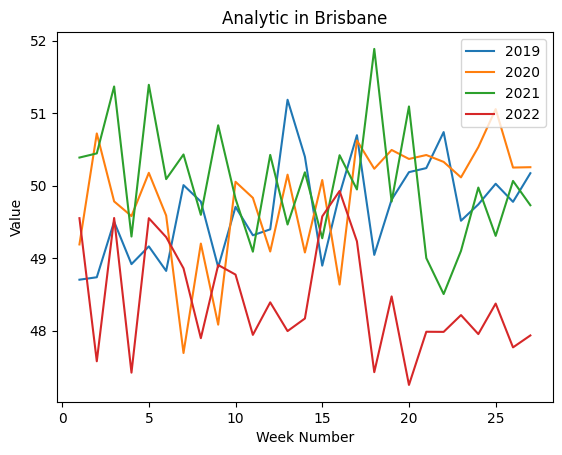

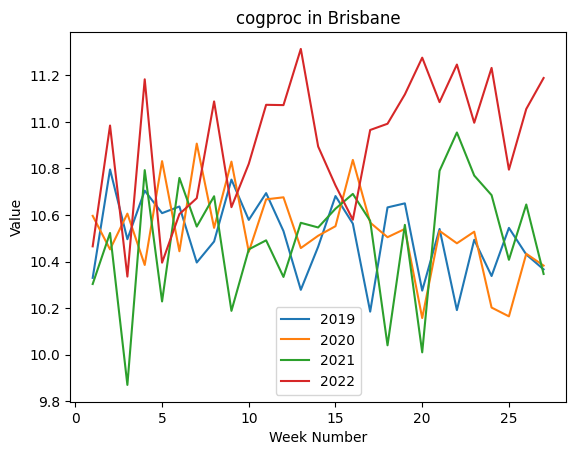

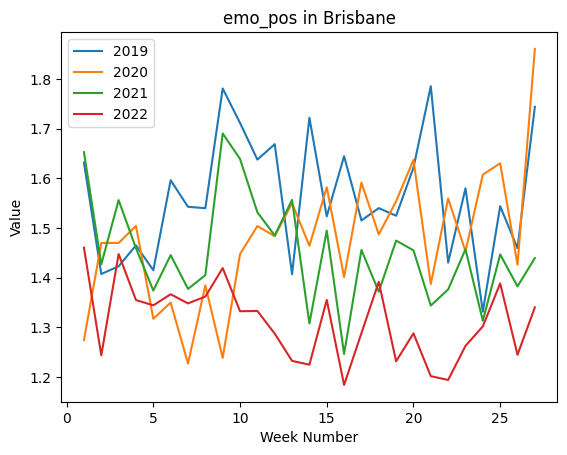

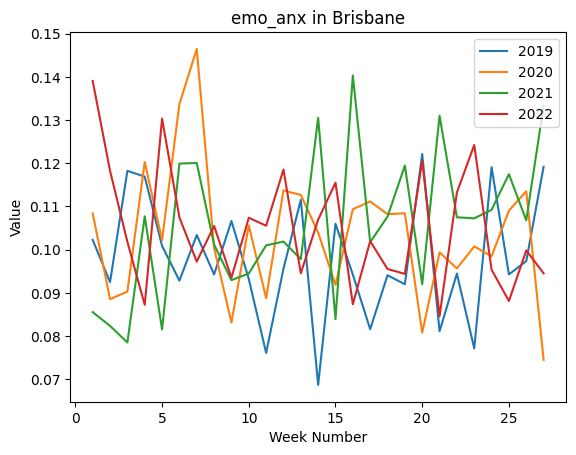

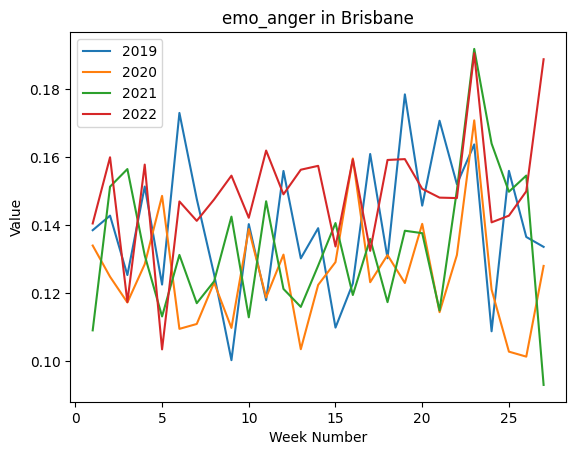

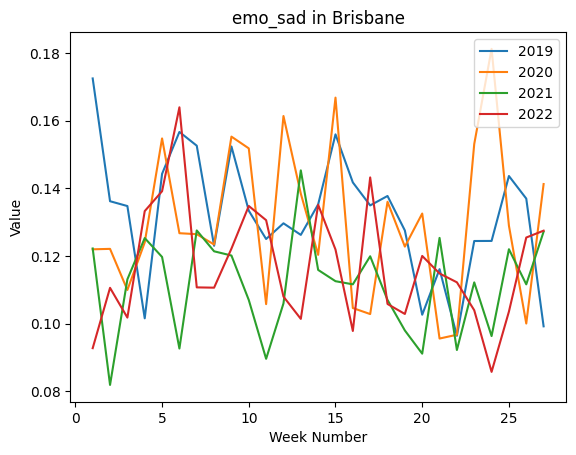

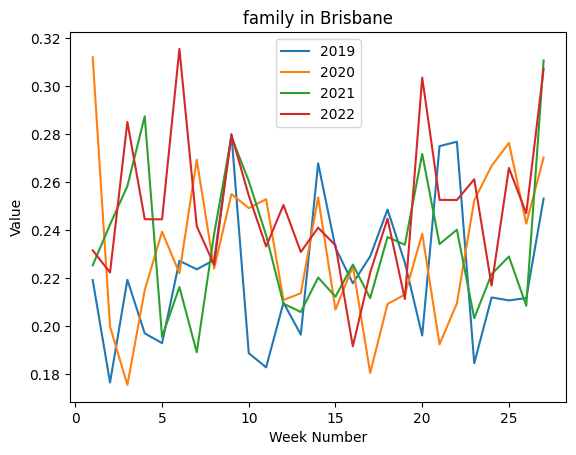

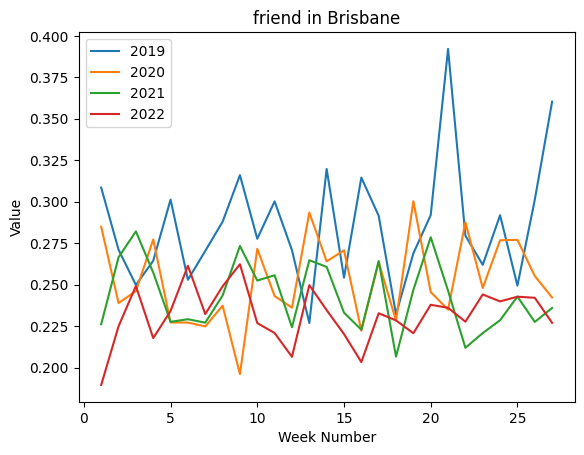

In [39]:
visualize(dataframes_to_vis, '2W')